# ML Final Project 

## Problem 
<span style="color: #000; font-family: Babas; font-size: 1.5em;">Using the data, what are the most important factors in whether or not somebody will seek treatment for mental health?  Once we have identified them, can we determine who did not seek treatment but should? With how much accuracy?</span>


### Dateset: Mental Health Survey in Tech  
This dataset is a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.  https://www.kaggle.com/osmi/mental-health-in-tech-survey

This dataset contains the 27 types of data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

#### Our target variable is treatment (Have you sought treatment for a mental health condition?)







## Data preparation

### How did you gather and prepare the data for analysis?
removed the timestamp and comments columns(useless)

removed the state column(too many missing values) 

replaced rediculous numbers in the age column (e.g. Were listed as 999999999 or -29) with the median value.

reclassify gender column to male, female, trans, and non-binary.

Columns that had strings(categorical) in the cells were transformed into numbers.

The values in the age and country columns were rescaled 


In [1241]:
import pandas as pd
import numpy as np

In [1242]:
#load data 
data=pd.read_csv("survey.csv")

In [1243]:
data.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [1244]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

“object”  in Pandas’ world is a string (text).



In [1245]:
type(data["Timestamp"][0] )

str

In [1246]:
# missing values in each column
data.isnull().sum()


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

coulumns with missing values:

state                         515

self_employed                  18

work_interfere                264

comments                     1095


Since the timestap column isn't meaningful, then comments and state columns has more than a half missing value, it's better to drop the columns 

In [1247]:
#drop useless columns
data=data.drop(['comments'], axis= 1)
data=data.drop(['Timestamp'], axis= 1)


In [1248]:
data=data.drop(["state"],axis=1)

In [1249]:
data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [1250]:
#check column values
data["Gender"].unique() 

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [1251]:
len(data["Gender"].unique() )

49

There are too many levels in the gender features. Reclassified them into 4 categories

In [1252]:
#reclassify the gender label 
male_list=['M', 'Male', 'male','m', 'maile','something kinda male?','Male (CIS)','Cis Male','Mal','Make',
       'Male ', 'Man','msle','Mail', 'cis male','Malr', 'Cis Man']

In [1253]:
female_list=['Female','female', 'F','Cis Female','Woman', 'f','Femake', 'woman','Female ','cis-female/femme','Female (cis)',
       'femail']

In [1254]:
trans_list=['Trans-female','Trans woman','Female (trans)']

In [1255]:
non_binary_list=['queer/she/they','Male-ish','non-binary','Nah', 'Guy (-ish) ^_^',"male leaning androgynous",
            'All','fluid',"Enby", 'Genderqueer','Androgyne', 'Agender','Neuter','queer','ostensibly male, unsure what that really means']

In [1256]:
what_list=['p','A little about you']

In [1257]:
len(male)+len(female)+len(trans)+len(what_list)+len(non_binary)

49

In [1258]:
data["Gender"]=data["Gender"].replace(male_list, "male")

In [1259]:
data["Gender"]=data["Gender"].replace(female_list, "female")

In [1260]:
data["Gender"]=data["Gender"].replace(trans_list, "trans")

In [1261]:
data["Gender"]=data["Gender"].replace(non_binary_list, "non_binary")

In [1262]:
def findIndex(num):
        for i in range(len(data)):
            if data["Gender"][i]==num:
                  print(i)

In [1263]:
findIndex('A little about you')

989


In [1264]:
data["Gender"][1127]

'p'

In [1265]:
data=data.drop([1127,989])

In [1266]:
data["Gender"].unique()

array(['female', 'male', 'non_binary', 'trans'], dtype=object)

In [1267]:
data["leave"].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [1268]:
data["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,          11,
                72])

In [1269]:
data["Age"].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 46             12
 45             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 56              4
 49              4
 57              3
 55              3
 54              3
 60              2
 47              2
 11              1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
 5               1
Name: Age, dtype: int64

Change the impossible age values like 99999999999, 329,-1726,-29,-1 to the median of age

In [1270]:
data["Age"].median()

31.0

In [1271]:
data['Age']=data['Age'].replace([99999999999, 329,-1726,-29,-1 ], 31)

In [1272]:
data["treatment"].unique()

array(['Yes', 'No'], dtype=object)

In [1273]:
data["self_employed"].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [1274]:
#deal with Nan value
data2=data.fillna(value="Nan")

In [1275]:
data2.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [1276]:
#encode categorical features
from sklearn.preprocessing import LabelEncoder

In [1277]:
data_trans=data2.apply(LabelEncoder().fit_transform)

In [1278]:
data_trans.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,21,0,44,0,0,1,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,28,1,44,0,0,0,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,16,1,6,0,0,0,3,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,15,1,43,0,1,1,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,15,1,44,0,0,0,1,1,1,1,...,0,0,1,1,1,2,2,2,0,0


In [1279]:
data_trans.corr()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.055569,0.151630,0.056759,0.011732,0.075760,0.042380,0.032466,0.143436,-0.057116,...,0.025353,-0.014259,0.027967,-0.050933,-0.009894,0.006917,0.062044,-0.021660,-0.016287,0.069749
Gender,0.055569,1.000000,-0.071155,0.044827,-0.122491,-0.138354,-0.080788,0.024641,-0.009406,0.053937,...,-0.021121,0.030428,0.030217,0.022108,0.042532,0.059698,-0.040418,-0.016751,-0.006311,-0.034115
Country,0.151630,-0.071155,1.000000,-0.097173,0.065099,0.080096,0.029436,0.096334,-0.014481,-0.040524,...,0.004720,-0.099812,-0.042254,-0.012326,-0.028268,0.000714,0.058061,-0.013326,-0.009082,-0.066102
self_employed,0.056759,0.044827,-0.097173,1.000000,0.004179,0.015456,0.025630,-0.307156,0.285267,0.065008,...,0.106136,0.172873,0.023307,-0.002612,0.039914,0.018789,-0.013353,-0.029446,0.128920,0.070546
family_history,0.011732,-0.122491,0.065099,0.004179,1.000000,0.376714,0.323058,-0.050623,0.011448,-0.047080,...,0.060902,0.019289,0.025304,-0.001948,-0.004154,0.001608,0.039583,0.036510,0.038376,0.120771
treatment,0.075760,-0.138354,0.080096,0.015456,0.376714,1.000000,0.615657,-0.047733,0.024593,-0.032295,...,0.140905,0.059034,0.027943,-0.012776,0.066022,-0.037944,0.094859,0.049234,0.060552,0.154008
work_interfere,0.042380,-0.080788,0.029436,0.025630,0.323058,0.615657,1.000000,-0.062329,0.035232,0.006033,...,0.064044,0.050966,0.061045,-0.019925,0.004556,-0.099787,0.100299,-0.016706,0.047686,0.135488
no_employees,0.032466,0.024641,0.096334,-0.307156,-0.050623,-0.047733,-0.062329,1.000000,-0.208888,-0.111023,...,-0.004915,-0.094118,-0.007596,-0.069364,-0.086420,-0.050076,0.019329,0.030541,-0.027426,-0.014758
remote_work,0.143436,-0.009406,-0.014481,0.285267,0.011448,0.024593,0.035232,-0.208888,1.000000,0.130228,...,-0.006332,0.095886,0.051372,-0.015531,0.078716,0.022677,-0.036445,-0.018747,0.033242,-0.045254
tech_company,-0.057116,0.053937,-0.040524,0.065008,-0.047080,-0.032295,0.006033,-0.111023,0.130228,1.000000,...,-0.052128,0.046195,0.000218,0.064646,0.074318,0.048796,-0.043344,-0.033602,0.028178,-0.064468


In [1280]:
import plotly as plt
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in("ruyyy1121","ybEE6RGKuzUxYMFZ6yvi")
plt.offline.init_notebook_mode(connected=True)
dataC = [go.Heatmap( z=data_trans.corr().values.tolist(),
                  x=['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
                   y=['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'])]

py.iplot(dataC, filename='labelled-heatmap')

#### from this correlation chart, work interfere (If you have a mental health condition, do you feel that it interferes with your work?)  has the largest correlation with the target variable treatment. 
#### Next is family_history(Do you have a family history of mental illness?)

In [1281]:
data.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [1282]:
y=data_trans["treatment"]

In [1283]:
features=['Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

In [1284]:
X=data_trans.loc[:, features]

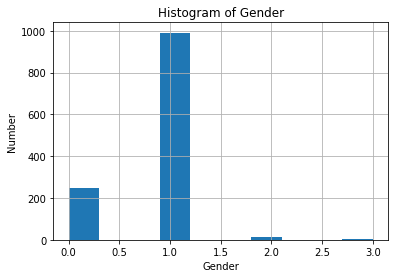

In [1285]:
import matplotlib.pyplot as pltt
X.Gender.hist()
pltt.title('Histogram of Gender')
pltt.xlabel('Gender')
pltt.ylabel('Number')

In [1286]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le_g=le.fit(data2["Gender"])

In [1287]:
le_g.inverse_transform([0,1,2,3,])

array(['female', 'male', 'non_binary', 'trans'], dtype=object)

###### Most of the people attended the survey are male

### Feature scaling: Scaleing age column and gender column becuase they are too different from other label. To scale them so that we can compare thier relative importance.

In [1288]:
min_max_scaler = preprocessing.MinMaxScaler()
X["Age"] = min_max_scaler.fit_transform(X[["Age"]])
X.head(5)

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.456522,0,44,0,0,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,0.608696,1,44,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.347826,1,6,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,0.326087,1,43,0,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,0.326087,1,44,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


In [1289]:
X['Country'] = min_max_scaler.fit_transform(X[['Country']])
X.head(5)

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.456522,0,0.956522,0,0,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,0.608696,1,0.956522,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.347826,1,0.130435,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,0.326087,1,0.934783,0,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,0.326087,1,0.956522,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


In [1290]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Model Building

### Logistoc regression

In [1291]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
model1=logreg.fit(x_train,y_train )
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1292]:
#how well the model learnt the train data
model1.score(x_train, y_train)

0.82025028441410697

In [1293]:
model1.score(x_test, y_test)

0.77248677248677244

So in this model, 77% of the variability in y_test can be explained using x_test

## What are the most important factors in whether or not somebody will seek treatment for mental health? 

### Coefficients

In [1294]:
model1.coef_

array([[ 0.44167615, -0.60292965,  0.12852138, -0.13798879,  0.96221728,
         0.95936528, -0.04045515,  0.12900126, -0.52420735,  0.30552977,
         0.26760835, -0.02744175, -0.3659579 ,  0.26689966,  0.001075  ,
        -0.15639271,  0.01216042,  0.42348282, -0.20858439, -0.03973734,
         0.26869801, -0.06801734,  0.7934968 ]])

In [1295]:
coe=pd.DataFrame(list(zip(x_train.columns, np.transpose(model1.coef_))))

In [1296]:
coe.sort_values(by=[1])

,0,1
1,Gender,[-0.602929647856]
8,tech_company,[-0.52420734567]
12,seek_help,[-0.365957895247]
18,supervisor,[-0.208584385146]
15,mental_health_consequence,[-0.156392711508]
3,self_employed,[-0.137988792788]
21,mental_vs_physical,[-0.0680173443505]
6,no_employees,[-0.0404551502378]
19,mental_health_interview,[-0.0397373363719]
11,wellness_program,[-0.0274417468378]


The the variable with high positive coefficients 
####  family_history, then work_interfere, obs_consequence(Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?), and Age. The lowest negative coefficient is for Gender. 

So features like: 
### family_history, work_interfere, obs_consequence, Age, Gender 
affect more whether someone seeks treatment for his mental illness or not  according to the coefficients.

In [1297]:
intercept = model1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.3024187471680118


### Recursive Feature Elimination

It works by recursively removing attributes and building a model on those attributes that remain.

In [1298]:
from sklearn.feature_selection import RFE
rfe = RFE(model1, 6)
rfe = rfe.fit(x_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True False False  True  True False False
 False False False False False False False False False False  True]
[ 3  1 12 11  1  1 15 10  1  1  5 16  4  7 18  9 17  2  8 14  6 13  1]


In [1299]:
x_train.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [1300]:
feature_1st_rank=['Age', 'Gender', 'family_history','work_interfere','obs_consequence','benefits']

#### The result is almost the same with features selected accoring to coefficients. While benefits showed up

## RandomForest

In [1301]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0)
clf1.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### feature importances

In [1302]:
print(clf1.feature_importances_)


[ 0.03207323  0.03069445  0.01585042  0.00437567  0.14604486  0.51539412
  0.01286335  0.00323945  0.00507623  0.03072535  0.07060233  0.0086489
  0.0059123   0.01362695  0.0102988   0.01164275  0.00408249  0.00864637
  0.00691789  0.00631397  0.00759404  0.00683195  0.04254411]


In [1303]:
coe_t=pd.DataFrame(list(zip(x_train.columns, np.transpose(clf1.feature_importances_))))

In [1304]:
coe_t.sort_values(by=[1],ascending=False)

,0,1
5,work_interfere,0.515394
4,family_history,0.146045
10,care_options,0.070602
22,obs_consequence,0.042544
0,Age,0.032073
9,benefits,0.030725
1,Gender,0.030694
2,Country,0.015850
13,anonymity,0.013627
6,no_employees,0.012863


#### Acorrding to the importance value here, work_interfere, family_history, care_options, benefits,obs_consequence,Gender are selected. care_options, benefits even rank before gender and age.

In [1305]:
tree_feature_important=["work_interfere", "family_history", "care_options", "benefits","obs_consequence","Gender","Age" ]

In [1306]:
overall_feature_important=["work_interfere", "family_history", "care_options", "benefits","obs_consequence","Gender","Age" ]

### Based on above methods, work_interfere, family_history, care_options, benefits,obs_consequence, Gender, Age are important factors, but  work_interfere, family_history, obs_consequence, Gender, Age showed up stablely in three methods.

Tried to build model only with these import features, while the accuracy did not change much. So don't have to do it.

In [1307]:
X_selected=X.loc[:, overall_feature_selection]

In [1308]:
x_train_selected, x_test_slected, y_train_s, y_test_s = train_test_split(X_selected,y,test_size=0.2,random_state=0)

In [1309]:
logreg3 = LogisticRegression()
modelL_s=logreg3.fit(x_train_selected,y_train_s )
modelL_s

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1310]:
modelL_s.score(x_test_slected, y_test_s)

0.77777777777777779

In [1311]:
y_pred_s = modelL_s.predict(x_test_slected)

In [1312]:
print(classification_report(y_test_s, y_pred_s))

             precision    recall  f1-score   support

          0       0.83      0.71      0.77       129
          1       0.74      0.85      0.79       123

avg / total       0.78      0.78      0.78       252








## Evaluate and select model 

### What predictions can we make with our model? 

#### Can we determine who did not seek treatment but should and with how much accuracy? (Can we predict whether a patient should go to seek treatment of his/her mental illness or not according to the values obtained in the dataset with how much accuracy?)

### logsitic 

In [1313]:
y_pred = logreg.predict(x_test)

In [1314]:
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
confusionmatrix = confusion_matrix(y_test, y_pred)
confusionmatrix

array([[136,  55],
       [ 31, 156]])

The result of confusion_matrix tells that this model has 135+156 correct predictions and 31+55 incorrect predictions

In [1315]:
le_t=le.fit(data2["treatment"])

In [1316]:
le_t.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [1317]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.71      0.76       191
          1       0.74      0.83      0.78       187

avg / total       0.78      0.77      0.77       378



In [1318]:
y_pred_b=logreg.predict_proba(x_test)
y_pred_b=y_pred_b[:,1]

In [1319]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_b)

0.85449505837556339

In [1320]:
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred_b)

In [1321]:
roc_auc = metrics.auc(fpr1, tpr1)

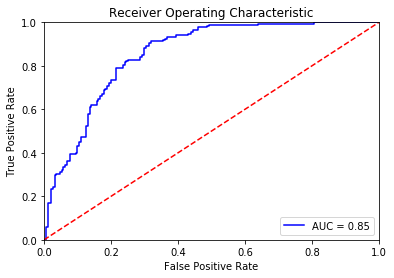

In [1322]:
import matplotlib.pyplot as pltt
pltt.title('Receiver Operating Characteristic')
pltt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
pltt.legend(loc = 'lower right')
pltt.plot([0, 1], [0, 1],'r--')
pltt.xlim([0, 1])
pltt.ylim([0, 1])
pltt.ylabel('True Positive Rate')
pltt.xlabel('False Positive Rate')
pltt.show()

In [1323]:
#change the penalty from l2 to l1 
#not much differentce
logreg2 = LogisticRegression(penalty='l1')
model2=logreg2.fit(x_train,y_train )
y_pred_2 = logreg2.predict(x_test)

In [1324]:
print(classification_report(y_test, y_pred_2))

             precision    recall  f1-score   support

          0       0.82      0.71      0.76       191
          1       0.74      0.84      0.79       187

avg / total       0.78      0.78      0.77       378



### Random forest

In [1325]:
y_pred_tree=clf1.predict(x_test)

In [1326]:
clf1.score(x_test,y_test)

0.80423280423280419

In [1327]:
roc_auc_score(y_test, y_pred_tree)

0.80544278634823763

In [1328]:
print(classification_report(y_test, y_pred_tree))

             precision    recall  f1-score   support

          0       0.90      0.69      0.78       191
          1       0.74      0.92      0.82       187

avg / total       0.82      0.80      0.80       378



### KNN

In [1329]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train) 



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [1330]:
y_pred_n=neigh.predict(x_test)


In [1331]:
roc_auc_score(y_test, y_pred_n)

0.74093568888764449

In [1332]:
print(classification_report(y_test, y_pred_n))

             precision    recall  f1-score   support

          0       0.75      0.72      0.74       191
          1       0.73      0.76      0.74       187

avg / total       0.74      0.74      0.74       378



### Bagging 

In [1333]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0)

In [1334]:
bagging

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [1335]:
bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [1336]:
y_pred_ba= bagging.predict(x_test)

In [1337]:
roc_auc_score(y_test, y_pred_ba)

0.7890080353893103

In [1338]:
print(classification_report(y_test, y_pred_ba))

             precision    recall  f1-score   support

          0       0.83      0.73      0.78       191
          1       0.75      0.85      0.80       187

avg / total       0.79      0.79      0.79       378



### Boosting

In [1339]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
clf5 = AdaBoostClassifier(n_estimators=600)


In [1340]:
clf5.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=600, random_state=None)

In [1341]:
y_pred_bo= clf5.predict(x_test)

In [1342]:
roc_auc_score(y_test, y_pred_bo)

0.79151384494778398

In [1343]:
print(classification_report(y_test, y_pred_bo))

             precision    recall  f1-score   support

          0       0.83      0.74      0.78       191
          1       0.76      0.84      0.80       187

avg / total       0.79      0.79      0.79       378



### How did you select and determine the correct model to answer your question?

#### Seems random forest is the best model from above evaluating methods.  Finally, try the voting methods and use cross_val_score to calculate the average accuracy of each model then select the best model

In [1371]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('lr', model1), ('rf', clf1), ('kn', neigh),("bagging",bagging),("boosting",clf5)], voting='hard')
for clf, label in zip([model1, clf1, neigh,bagging,clf5,eclf], ['Logistic Regression', 'Random Forest', 'KNN',"bagging","boosting", 'Ensemble(hard voting)']):
           scores = cross_val_score(clf, x_test, y_test, cv=5, scoring='accuracy')
           print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.03) [Logistic Regression]
Accuracy: 0.82 (+/- 0.03) [Random Forest]
Accuracy: 0.73 (+/- 0.03) [KNN]
Accuracy: 0.77 (+/- 0.05) [bagging]
Accuracy: 0.72 (+/- 0.02) [boosting]
Accuracy: 0.80 (+/- 0.03) [Ensemble]


In [1372]:
eclf2 = VotingClassifier(estimators=[('lr', model1), ('rf', clf1), ('kn', neigh),("bagging",bagging),("boosting",clf5)], voting='soft')
for clf, label in zip([model1, clf1, neigh,bagging,clf5,eclf2], ['Logistic Regression', 'Random Forest', 'KNN',"bagging","boosting", 'Ensemble(soft voting)']):
           scores = cross_val_score(clf, x_test, y_test, cv=5, scoring='accuracy')
           print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.03) [Logistic Regression]
Accuracy: 0.82 (+/- 0.03) [Random Forest]
Accuracy: 0.73 (+/- 0.03) [KNN]
Accuracy: 0.78 (+/- 0.03) [bagging]
Accuracy: 0.72 (+/- 0.02) [boosting]
Accuracy: 0.79 (+/- 0.01) [Ensemble]


### According to the cross validation, still Random Forest is the best model. All the model acurracy are closeto  80%.

### compare prediciton made by each model

In [1346]:
eclf.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=600, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [1347]:
eclf2.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=600, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [1348]:
y_e1=eclf.predict(x_test)

In [1349]:
y_e=eclf2.predict(x_test)

In [1351]:
#count the seperate total of each value 
#0 indicates no 1 indicates yes
from collections import Counter
Counter(y_e)

Counter({0: 161, 1: 217})

In [1352]:
Counter(y_e1)

Counter({0: 154, 1: 224})

In [1353]:
Counter(y_pred_tree)

Counter({0: 147, 1: 231})

In [1354]:
Counter(y_pred)

Counter({0: 167, 1: 211})

In [1355]:
Counter(y_pred_n)

Counter({0: 183, 1: 195})

In [1356]:
Counter(y_pred_ba)

Counter({0: 167, 1: 211})

In [1357]:
Counter(y_pred_bo)

Counter({0: 172, 1: 206})

In [1358]:
Counter(y_test)

Counter({0: 191, 1: 187})

#### From above results, it seems the prediction made by knn is more close to the true value. But according to the cross validation  accuracy, Random Forest will be better in predicting. While it is just one time test.

#### The dataset just has aroud 1000 records, we need more data and test more.

In [1373]:
result_lo=le_t.inverse_transform(y_e1)

In [1374]:
y_testC=le_t.inverse_transform(y_test)

In [1379]:
#using the prediction made by ensemble hard voting
for i in range(len(y_test)):
    if result_lo[i]=="Yes":
        if y_testC[i]=="No":
            print("Number {} worker did not go to treatment but he may need to".format(i))

Number 0 worker did not go to treatment but he may need to
Number 4 worker did not go to treatment but he may need to
Number 5 worker did not go to treatment but he may need to
Number 7 worker did not go to treatment but he may need to
Number 16 worker did not go to treatment but he may need to
Number 25 worker did not go to treatment but he may need to
Number 37 worker did not go to treatment but he may need to
Number 45 worker did not go to treatment but he may need to
Number 59 worker did not go to treatment but he may need to
Number 60 worker did not go to treatment but he may need to
Number 61 worker did not go to treatment but he may need to
Number 62 worker did not go to treatment but he may need to
Number 66 worker did not go to treatment but he may need to
Number 80 worker did not go to treatment but he may need to
Number 92 worker did not go to treatment but he may need to
Number 93 worker did not go to treatment but he may need to
Number 94 worker did not go to treatment but

In [1377]:
#using the prediction made by KNN
result_K=le_t.inverse_transform(y_pred_n)

In [1378]:
for i in range(len(y_test)):
    if result_K[i]=="Yes":
        if y_testC[i]=="No":
            print("Number {} worker did not go to treatment but he may need to".format(i))

Number 0 worker did not go to treatment but he may need to
Number 4 worker did not go to treatment but he may need to
Number 5 worker did not go to treatment but he may need to
Number 16 worker did not go to treatment but he may need to
Number 25 worker did not go to treatment but he may need to
Number 35 worker did not go to treatment but he may need to
Number 37 worker did not go to treatment but he may need to
Number 45 worker did not go to treatment but he may need to
Number 59 worker did not go to treatment but he may need to
Number 60 worker did not go to treatment but he may need to
Number 61 worker did not go to treatment but he may need to
Number 80 worker did not go to treatment but he may need to
Number 92 worker did not go to treatment but he may need to
Number 93 worker did not go to treatment but he may need to
Number 96 worker did not go to treatment but he may need to
Number 106 worker did not go to treatment but he may need to
Number 110 worker did not go to treatment 

### What additional information or analysis might improve your model results or work to control limitations?
Mental health issue is a complex matter  we need to rise the accuracy to a higher level.
The survey should be extended and used across wider portions of the tech industry. We need more data and test more.
In the future, data should also be taken from other industries.
